In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

data=pd.read_csv("C:/opt/spark/projects/predict_ad/advertising.csv")
data=data.rename(index=float,columns={"Daily Time Spent on Site":"Site time spent"})
print(data)
for line in data.itertuples():
    print(line[1])



       Site time spent  Age  Area Income  Daily Internet Usage  \
0.0              68.95   35     61833.90                256.09   
1.0              80.23   31     68441.85                193.77   
2.0              69.47   26     59785.94                236.50   
3.0              74.15   29     54806.18                245.89   
4.0              68.37   35     73889.99                225.58   
5.0              59.99   23     59761.56                226.74   
6.0              88.91   33     53852.85                208.36   
7.0              66.00   48     24593.33                131.76   
8.0              74.53   30     68862.00                221.51   
9.0              69.88   20     55642.32                183.82   
10.0             47.64   49     45632.51                122.02   
11.0             83.07   37     62491.01                230.87   
12.0             69.57   48     51636.92                113.12   
13.0             79.52   24     51739.63                214.23   
14.0      

64.2
43.7
72.97
51.3
51.63
55.55
45.01


In [176]:
#Checking the number of null values
print(data.isnull().sum())
print(data.shape)

Site time spent         0
Age                     0
Area Income             0
Daily Internet Usage    0
Ad Topic Line           0
City                    0
Male                    0
Country                 0
Timestamp               0
Clicked on Ad           0
dtype: int64
(1000, 10)


Index(['Site time spent', 'Age', 'Area Income', 'Daily Internet Usage',
       'Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp',
       'Clicked on Ad'],
      dtype='object')
                      Site time spent       Age  Area Income  \
Site time spent              1.000000 -0.331513     0.310954   
Age                         -0.331513  1.000000    -0.182605   
Area Income                  0.310954 -0.182605     1.000000   
Daily Internet Usage         0.518658 -0.367209     0.337496   
Male                        -0.018951 -0.021044     0.001322   
Clicked on Ad               -0.748117  0.492531    -0.476255   

                      Daily Internet Usage      Male  Clicked on Ad  
Site time spent                   0.518658 -0.018951      -0.748117  
Age                              -0.367209 -0.021044       0.492531  
Area Income                       0.337496  0.001322      -0.476255  
Daily Internet Usage              1.000000  0.028012      -0.786539  
Male              

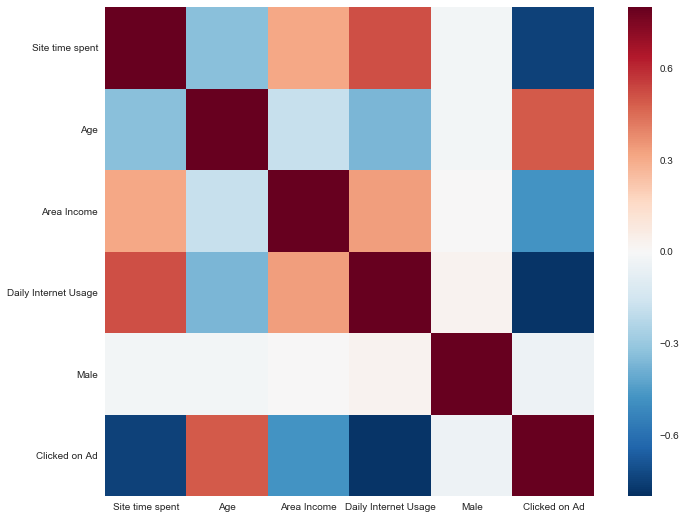

In [177]:
print(data.columns)
#Visualizing the correlation matrix
corrmatrix=data.corr()
print(corrmatrix)
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmatrix, vmax=.8, square=True);


In [178]:
#Before applying Linear regression we need to convert the string columns(Ad topic Line,City Country,Timestamp) to numerical columns
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['Ad Topic Line']=labelencoder.fit_transform(data['Ad Topic Line'])
data['Country']=labelencoder.fit_transform(data['Country'])
data['Timestamp']=labelencoder.fit_transform(data['Timestamp'])
data['City']=labelencoder.fit_transform(data['City'])
print(data)



       Site time spent  Age  Area Income  Daily Internet Usage  Ad Topic Line  \
0.0              68.95   35     61833.90                256.09             91   
1.0              80.23   31     68441.85                193.77            464   
2.0              69.47   26     59785.94                236.50            566   
3.0              74.15   29     54806.18                245.89            903   
4.0              68.37   35     73889.99                225.58            766   
5.0              59.99   23     59761.56                226.74            805   
6.0              88.91   33     53852.85                208.36            222   
7.0              66.00   48     24593.33                131.76            723   
8.0              74.53   30     68862.00                221.51            107   
9.0              69.88   20     55642.32                183.82            454   
10.0             47.64   49     45632.51                122.02             86   
11.0             83.07   37 

C:\Users\nitesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


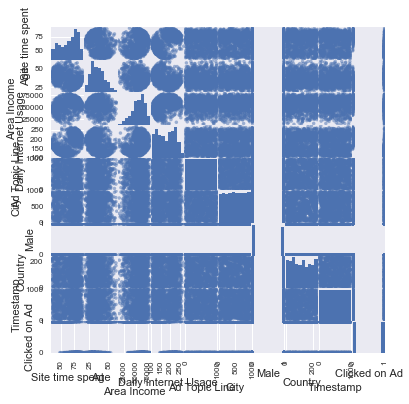

In [179]:
pd.scatter_matrix(data,figsize=(6,6))
plt.show()

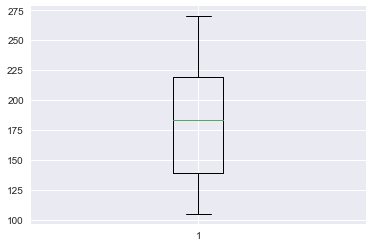

In [180]:
#Boxplot visualization to check for outliers in the columns
plt.boxplot(data['Daily Internet Usage'])
plt.show()

In [181]:
from sklearn.model_selection import train_test_split
features=data.iloc[:,:-1].values
label=data.iloc[:,-1].values
print(features)
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

[[  6.89500000e+01   3.50000000e+01   6.18339000e+04 ...,   0.00000000e+00
    2.15000000e+02   4.39000000e+02]
 [  8.02300000e+01   3.10000000e+01   6.84418500e+04 ...,   1.00000000e+00
    1.47000000e+02   4.74000000e+02]
 [  6.94700000e+01   2.60000000e+01   5.97859400e+04 ...,   0.00000000e+00
    1.84000000e+02   3.67000000e+02]
 ..., 
 [  5.16300000e+01   5.10000000e+01   4.24157200e+04 ...,   1.00000000e+00
    1.40000000e+02   1.50000000e+02]
 [  5.55500000e+01   1.90000000e+01   4.19207900e+04 ...,   0.00000000e+00
    8.50000000e+01   4.22000000e+02]
 [  4.50100000e+01   2.60000000e+01   2.98758000e+04 ...,   0.00000000e+00
    2.80000000e+01   7.72000000e+02]]
(800, 9) (200, 9)
(800,) (200,)


In [182]:
#Fitting a model(Let's start with a simple model)
import random
random.seed(9000)
from sklearn.linear_model import LogisticRegression
lm=linear_model.LogisticRegression()
model=lm.fit(X_train,y_train)
predictions_LR=lm.predict(X_test)
print(predictions_LR)
#Predicting the score or accuracy of the model
print("Accuracy of logistic classifier on the test set:{:.2f}".format(lm.score(X_test, y_test)))

[1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1]
Accuracy of logistic classifier on the test set:0.91


In [183]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predictions_LR)
print(cf)

[[89  8]
 [10 93]]


In [184]:
#Precision,Recall and F-score
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_LR))

#The model has a high precision and high recall score means that it correctly predicts many users clicking on the ad as 1 
#and users who havent clicked as 0, in short,the model has high performance.


             precision    recall  f1-score   support

          0       0.90      0.92      0.91        97
          1       0.92      0.90      0.91       103

avg / total       0.91      0.91      0.91       200



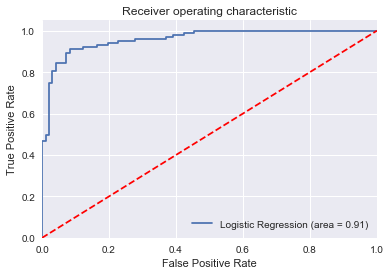

In [185]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [186]:
#Let's try another classifer-Decsion Trees
from sklearn import tree
DT=tree.DecisionTreeClassifier(splitter='best')
DT.fit(X_train,y_train)
predictions_DT=DT.predict(X_test)
print(predictions_DT)
#Predicting the score or accuracy of the model(Achieved better accuracy than the simple Logistic regression)
print("Accuracy of Decision Tree classifier on the test set:{:.2f}".format(DT.score(X_test, y_test)))

[1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1]
Accuracy of Decision Tree classifier on the test set:0.94


In [187]:
#Precision,Recall and F-score of the Decision Tree classifier
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_DT))

#Precision and recall have improved when on comparing with Logistic regression

             precision    recall  f1-score   support

          0       0.93      0.94      0.93        97
          1       0.94      0.93      0.94       103

avg / total       0.94      0.94      0.94       200



In [188]:
#Now,let us go one step further and use the all powerful bagging classifier-random forest
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=1000)
RF.fit(X_train,y_train)
predictions_RF=RF.predict(X_test)
print(predictions_RF)
print("Accuracy of Random Forest classifier on the test set:{:.2f}".format(RF.score(X_test, y_test)))

#Not much increase in Accuracy even with 1000 trees in the forest

[1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1]
Accuracy of Random Forest classifier on the test set:0.97


In [189]:
#Let's see how removing these 2 features affects the accuracy of the model
del data['Ad Topic Line']
del data['Timestamp']

In [200]:
from sklearn.model_selection import train_test_split
features=data.iloc[:,:-1].values
label=data.iloc[:,-1].values
print(features)
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

#Fitting a model(Let's start with a simple model)
random.seed(9000)
from sklearn.linear_model import LogisticRegression
lm=linear_model.LogisticRegression()
model=lm.fit(X_train,y_train)
predictions_LR=lm.predict(X_test)
print(predictions_LR)
#Predicting the score or accuracy of the model
print("Accuracy of logistic classifier on the test set:{:.2f}".format(lm.score(X_test, y_test)))

[[  6.89500000e+01   3.50000000e+01   6.18339000e+04 ...,   9.61000000e+02
    0.00000000e+00   2.15000000e+02]
 [  8.02300000e+01   3.10000000e+01   6.84418500e+04 ...,   9.03000000e+02
    1.00000000e+00   1.47000000e+02]
 [  6.94700000e+01   2.60000000e+01   5.97859400e+04 ...,   1.11000000e+02
    0.00000000e+00   1.84000000e+02]
 ..., 
 [  5.16300000e+01   5.10000000e+01   4.24157200e+04 ...,   7.98000000e+02
    1.00000000e+00   1.40000000e+02]
 [  5.55500000e+01   1.90000000e+01   4.19207900e+04 ...,   9.35000000e+02
    0.00000000e+00   8.50000000e+01]
 [  4.50100000e+01   2.60000000e+01   2.98758000e+04 ...,   7.44000000e+02
    0.00000000e+00   2.80000000e+01]]
(800, 7) (200, 7)
(800,) (200,)
[0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0
 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 